# Student Succes Dataset

This notebook will contains some of my work on a dataset found on Kaggle (https://www.kaggle.com/competitions/playground-series-s4e6/data?select=test.csv). Note that this is a synthetic dataset created with the goal of The goal of this competition is to predict academic risk of students in higher education.

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [57]:
train = pd.read_csv("data/train.csv")

In [58]:
train.shape

(76518, 38)

In [59]:
train.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


Notes on the meaning of each feature in the dataset (where applicable): <br><br>
       For information about different features of the dataset, info can be found at:
    https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success 

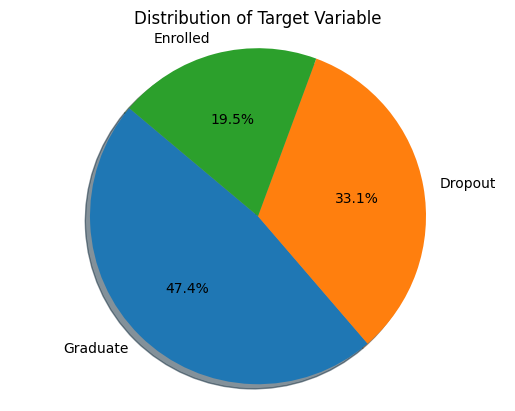

In [60]:
## Plotting Target Feature
target_counts = train["Target"].value_counts()

plt.pie(target_counts,labels=target_counts.index, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Distribution of Target Variable")
plt.show()

In [61]:
## Encode target variable
le_encoder = LabelEncoder()

## fit and transform target variable
train["Target"] = le_encoder.fit_transform(train["Target"])

In [62]:
## train test split
y = train["Target"]
X = train.drop(columns=["Target"])

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [63]:
## Model
clf = RandomForestClassifier(n_estimators = 100, random_state=42)

## Fit Model
clf.fit(X_train, y_train)

## Predict
y_pred = clf.predict(X_test)


## Model Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"accuracy_score : {acc : .2f}")

## Classification Report 
print(classification_report(y_test, y_pred))

accuracy_score :  0.83
              precision    recall  f1-score   support

           0       0.90      0.83      0.86      5028
           1       0.65      0.60      0.62      3017
           2       0.85      0.92      0.89      7259

    accuracy                           0.83     15304
   macro avg       0.80      0.78      0.79     15304
weighted avg       0.83      0.83      0.83     15304



#### Quick Refresher on Some of these metrics:

1. Percision:
    TP/TP+FP
    The ratio of correctly predicted positive observations

2. Recall:
    The ration of correctly predicted positive observations to all observations in the actual class.
    It tells you how many of the actual positives are caputed by the model
​

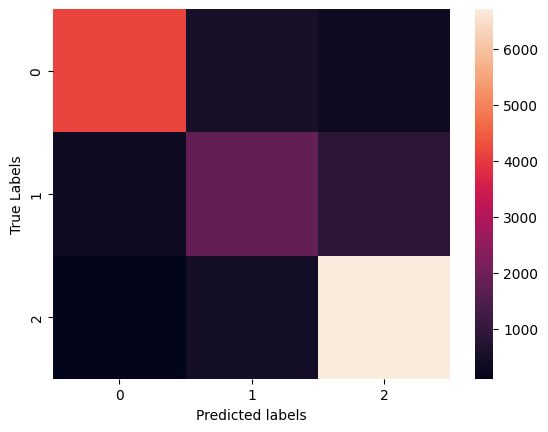

In [64]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm)
plt.xlabel('Predicted labels')
plt.ylabel("True Labels")
plt.show()

In [67]:
## trying out on test set

test = pd.read_csv("data/test.csv")
final_pred = clf.predict(test)

print(type(final_pred))

<class 'numpy.ndarray'>


In [80]:
final_sub = test.join(pd.Series(final_pred, name="Target"))
final_sub = final_sub[["id", "Target"]]

final_sub.to_csv('submission.csv', index=False)